# PROJECT

# Cross-Sell Prediction
#Problem Statement:
predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

In [1]:
#LIBRARIES
import numpy as np                                   #Linear algebra  #used for working with arrays
import pandas as pd                                  #Analyze data.learning by reading
import matplotlib.pyplot as plt                      #Data Visuallization
import seaborn as sns                                #data visuallization library based on matplotlib
from sklearn.preprocessing import LabelEncoder       #Converts categorical column into numerical column
le=LabelEncoder()                                    #creating alias
import warnings                                      #It ignores the warnings
warnings.filterwarnings('ignore')                    #It ignores the warnings
from sklearn.linear_model import LogisticRegression  #LogisticRegression
from sklearn.tree import DecisionTreeClassifier      #DecisionTree
from sklearn.ensemble import RandomForestClassifier  #Random Forest
from sklearn.ensemble import AdaBoostClassifier      #AdaBoost(Boosting)
from sklearn.tree import DecisionTreeClassifier      #Decision Tree
from xgboost import XGBClassifier                    #Xgboost
from sklearn.svm import SVC                          #Support Vector Machine
from sklearn.naive_bayes import MultinomialNB        #Naive Bayes
from sklearn.neighbors import KNeighborsClassifier   #K-Nearest Neighbour
from imblearn.under_sampling import NearMiss         #Near Miss(Class Imbalance Technique)
from sklearn.feature_selection import RFE            #Feature Selection
from sklearn.tree import DecisionTreeClassifier      #Feature Selection
from sklearn.metrics import confusion_matrix         #Confusion Matrix
from sklearn.metrics import classification_report    #classification_report
from sklearn.metrics import roc_auc_score            #AUC_ROC_Curve
from sklearn.metrics import roc_curve                #AUC_ROC_Curve
from scipy.stats import skew                         #used for solving mathematical, scientific, engineering, and technical problems

In [2]:
#Reading the csv file with help of pandas library
train=pd.read_csv(r"C:\Users\HP\Desktop\Cross Sell-Prediction\train.csv")
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


In [3]:
train.info()  #infornation about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [4]:
train.shape

(381109, 12)

In [5]:
#Accessing starting 5 rows
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [6]:
#Accessing last 5 rows
train.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0
381108,381109,Male,46,1,29,0,1-2 Year,No,41777,26,237,0


In [7]:
train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
5,6,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0
6,7,Male,23,1,11,0,< 1 Year,Yes,23367,152,249,0
7,8,Female,56,1,28,0,1-2 Year,Yes,32031,26,72,1
8,9,Female,24,1,3,1,< 1 Year,No,27619,152,28,0
9,10,Female,32,1,6,1,< 1 Year,No,28771,152,80,0


In [8]:
train.describe()   #Working on numerical columns only

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
train.describe(include="all")

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [10]:
#Accessing all columns of dataset
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [11]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# Data Cleaning

In [12]:
train=train.drop(["id"],axis=1)

In [13]:
#checking null values from all columns
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [14]:
#train data is not having any missing values therefore no need to treat missing value

In [15]:
#finding the type of data
train.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object

here "Gender","Vehicle_Age","Vehicle_Damage" this three features are having object datatypes that's why we have to convert into numeric features               

In [16]:
from sklearn.preprocessing import LabelEncoder       #Converts categorical column into numerical column
le=LabelEncoder()

In [17]:
#Converting categorical column into numerical column(using LableEncoder)
train.Gender=le.fit_transform(train.Gender)
train.Vehicle_Age=le.fit_transform(train.Vehicle_Age)
train.Vehicle_Damage=le.fit_transform(train.Vehicle_Damage)

# Sampling the data

In [18]:
#Separate the features
x=train.iloc[:,0:-1]
y=train.iloc[:,-1]

In [19]:
#y.head()

In [20]:
#Split data into train and test sets
#train test ratio 80:20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((304887, 10), (76222, 10), (304887,), (76222,))

# Model on Train data to check performance after the data cleaning

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [23]:
lg.fit(x_train,y_train)

LogisticRegression()

In [24]:
lg_pred=lg.predict(x_test)
#lg_pred

In [25]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [26]:
m1=confusion_matrix(lg_pred,y_test)
m1

array([[66240,  8853],
       [  764,   365]], dtype=int64)

In [27]:
ac1=m1.diagonal().sum()/m1.sum()*100
ac1

87.3829078218887

In [28]:
#classification_report
from sklearn.metrics import classification_report

In [29]:
print(classification_report(lg_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     75093
           1       0.04      0.32      0.07      1129

    accuracy                           0.87     76222
   macro avg       0.51      0.60      0.50     76222
weighted avg       0.97      0.87      0.92     76222



In [30]:
#Logistic Regression
#the confusion matrix is good.
#the accuracy is good.
#precision, recall & f1-score shows high difference for 0 & 1.
#so it is not good algorithm.

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [32]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
dt_pred=dt.predict(x_test)
dt_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [34]:
#dt.feature_importances_

In [35]:
m2=confusion_matrix(dt_pred,y_test)
m2

array([[59919,  6358],
       [ 7085,  2860]], dtype=int64)

In [36]:
ac2=m2.diagonal().sum()/m2.sum()*100
ac2

82.3633596599407

In [37]:
print(classification_report(dt_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     66277
           1       0.31      0.29      0.30      9945

    accuracy                           0.82     76222
   macro avg       0.60      0.60      0.60     76222
weighted avg       0.82      0.82      0.82     76222



In [38]:
#Decision Tree
#confusion matrix is quite good.
#the accuracy is good but not that much.
#precision, recall & f1-score shows high difference for 0 & 1.
#so it is not good algorithm.

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [40]:
rf.fit(x_train,y_train) 

RandomForestClassifier()

In [41]:
rf_pred=rf.predict(x_test)
rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
m3=confusion_matrix(rf_pred,y_test)
m3

array([[65025,  8119],
       [ 1979,  1099]], dtype=int64)

In [43]:
ac3=m3.diagonal().sum()/m3.sum()*100
ac3

86.75185641940647

In [44]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     73144
           1       0.12      0.36      0.18      3078

    accuracy                           0.87     76222
   macro avg       0.54      0.62      0.55     76222
weighted avg       0.94      0.87      0.90     76222



In [45]:
#Random Forest
#confusion matrix is good.
#the accuracy is good.
#precision, recall & f1-score shows high difference for 0 & 1.
#so it is not good algorithm.

# Adaboost(boosting)

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
ab=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [48]:
ab.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [49]:
ab_pred=ab.predict(x_test)
ab_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
m4=confusion_matrix(ab_pred,y_test)
m4

array([[63360,  7688],
       [ 3644,  1530]], dtype=int64)

In [51]:
ac4=m4.diagonal().sum()/m4.sum()*100
ac4

85.1329012621028

In [52]:
print(classification_report(ab_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     71048
           1       0.17      0.30      0.21      5174

    accuracy                           0.85     76222
   macro avg       0.56      0.59      0.57     76222
weighted avg       0.89      0.85      0.87     76222



In [53]:
#Adaboost
#the confusion matrix is good.
#the accuracy is good but not that much.
#precision, recall & f1-score shows high difference for 0 & 1.
#so it is not good algorithm.

# Xgboost

In [54]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [55]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [56]:
xg_pred=xg.predict(x_test)
xg_pred

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
m5=confusion_matrix(xg_pred,y_test)
m5

array([[66730,  8987],
       [  274,   231]], dtype=int64)

In [58]:
ac5=m5.diagonal().sum()/m5.sum()*100
ac5

87.8499645771562

In [59]:
print(classification_report(xg_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     75717
           1       0.03      0.46      0.05       505

    accuracy                           0.88     76222
   macro avg       0.51      0.67      0.49     76222
weighted avg       0.99      0.88      0.93     76222



In [60]:
#Xgboost
#the confusion matrix is good.
#the accuracy is good.
#precision, recall & f1-score shows high difference for 0 & 1.
#so it is not good algorithm.

# Support Vector Machine

In [61]:
#from sklearn.svm import SVC
#sv=SVC()

In [62]:
#sv.fit(x_train,y_train)

In [63]:
#sv_pred=sv.predict(x_test)

In [64]:
#m6=confusion_matrix(sv_pred,y_test)
#m6

In [65]:
#ac6=m6.diagonal().sum()/m6.sum()*100
#ac6

In [66]:
#print(classification_report(sv_pred,y_test))

# Support Vector Machine taking more time to run that's why it is not suitable for the train data

# Naive Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [68]:
nb.fit(x_train,y_train)

MultinomialNB()

In [69]:
nb_pred=nb.predict(x_test)
nb_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [70]:
m7=confusion_matrix(nb_pred,y_test)
m7

array([[46398,  4665],
       [20606,  4553]], dtype=int64)

In [71]:
ac7=m7.diagonal().sum()/m7.sum()*100
ac7

66.84553016189551

In [72]:
print(classification_report(nb_pred,y_test))

              precision    recall  f1-score   support

           0       0.69      0.91      0.79     51063
           1       0.49      0.18      0.26     25159

    accuracy                           0.67     76222
   macro avg       0.59      0.54      0.53     76222
weighted avg       0.63      0.67      0.61     76222



In [73]:
#Naive Bayes
#the confusion matrix is good.
#the accuracy is not good.
#precision, recall & f1-score shows high difference for 0 & 1.
#so it is not good algorithm.

# K-Nearest Neighbour

In [74]:
#from sklearn.neighbors import KNeighborsClassifier
#kn=KNeighborsClassifier(n_neighbors=20)

In [75]:
#kn.fit(x_train,y_train)

In [76]:
#kn_pred=kn.predict(x_test)
#kn_pred

In [77]:
#m8=confusion_matrix(kn_pred,y_test)
#m8

In [78]:
#ac8=m8.diagonal().sum()/m8.sum()*100
#ac8

In [79]:
#print(classification_report(kn_pred,y_test))

In [80]:
#l=list()

In [81]:
#for i in range (1,50):
    #kn=KNeighborsClassifier(n_neighbors=i)
    #kn.fit(x_train,y_train)
    #c=confusion_matrix(kn_pred,y_test)
    #acc=c.diagonal().sum()/c.sum()*100
    #l.append(acc)

In [82]:
#p=plt.plot(l)

# KNN is a lazyevaluator as it required lot of time therefore knn is not suitable.

# We will check the balance-imbalance condition

In [83]:
#Class distrubution 
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<AxesSubplot:>

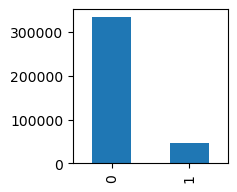

In [84]:
#plotting a bar chat to display the class distribution
train["Response"].value_counts().plot.bar(figsize=(2,2))

<AxesSubplot:xlabel='Response', ylabel='count'>

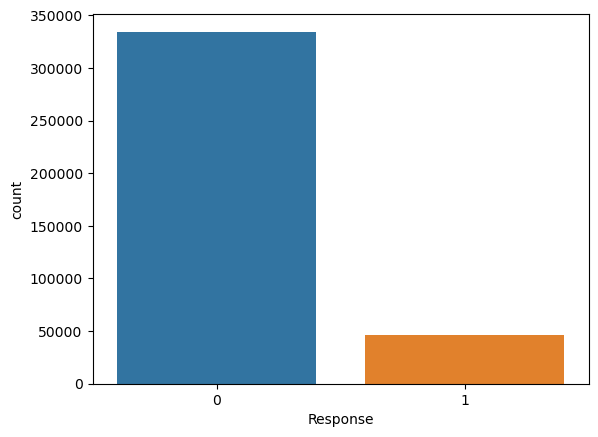

In [85]:
#plotting a count plot to display the class distribution
sns.countplot("Response",data=train)

# The train data having class imbalance problem therefore we have to use class imbalance technique

In [86]:
#undersampling-decresing the record which have highly reprensented(highest data)

# Near Miss
class imbalance technique

In [87]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()

In [88]:
tr_x=train.iloc[:,0:-1]
tr_y=train.iloc[:,-1]

In [89]:
x_nm,y_nm=nm.fit_resample(tr_x,tr_y)

In [90]:
x_nm.shape,y_nm.shape

((93420, 10), (93420,))

In [91]:
y_nm.value_counts()    #balanced

0    46710
1    46710
Name: Response, dtype: int64

<AxesSubplot:>

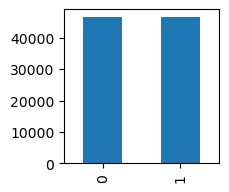

In [92]:
#plotting a bar chat to display the class distribution
y_nm.value_counts().plot.bar(figsize=(2,2))                           #balanced

# Now the class imbalance problem solved.

# EDA(Exploratory Data Analysis)

# Data Visuallization

# Correlation Plot

In [266]:
#Correlation plot
cr1=train.corr()
cr1

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,0.145545,-0.018374,0.000604,-0.081932,-0.112625,0.091606,0.003673,-0.111159,-0.002517,0.052440
Age,0.145545,1.000000,-0.079782,0.042574,-0.254682,-0.522300,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.018374,-0.079782,1.000000,-0.001081,0.014969,0.030173,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.000604,0.042574,-0.001081,1.000000,-0.024659,-0.027840,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.081932,-0.254682,0.014969,-0.024659,1.000000,0.174783,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,-0.112625,-0.522300,0.030173,-0.027840,0.174783,1.000000,-0.174238,0.023656,0.388551,0.002484,-0.104078
Vehicle_Damage,0.091606,0.267534,-0.016622,0.028235,-0.824143,-0.174238,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.023656,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.111159,-0.577826,0.043731,-0.042420,0.219381,0.388551,-0.224377,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.002517,-0.001264,-0.000848,-0.002750,0.002537,0.002484,-0.002064,-0.000608,0.000002,1.000000,-0.001050


# Heatmap

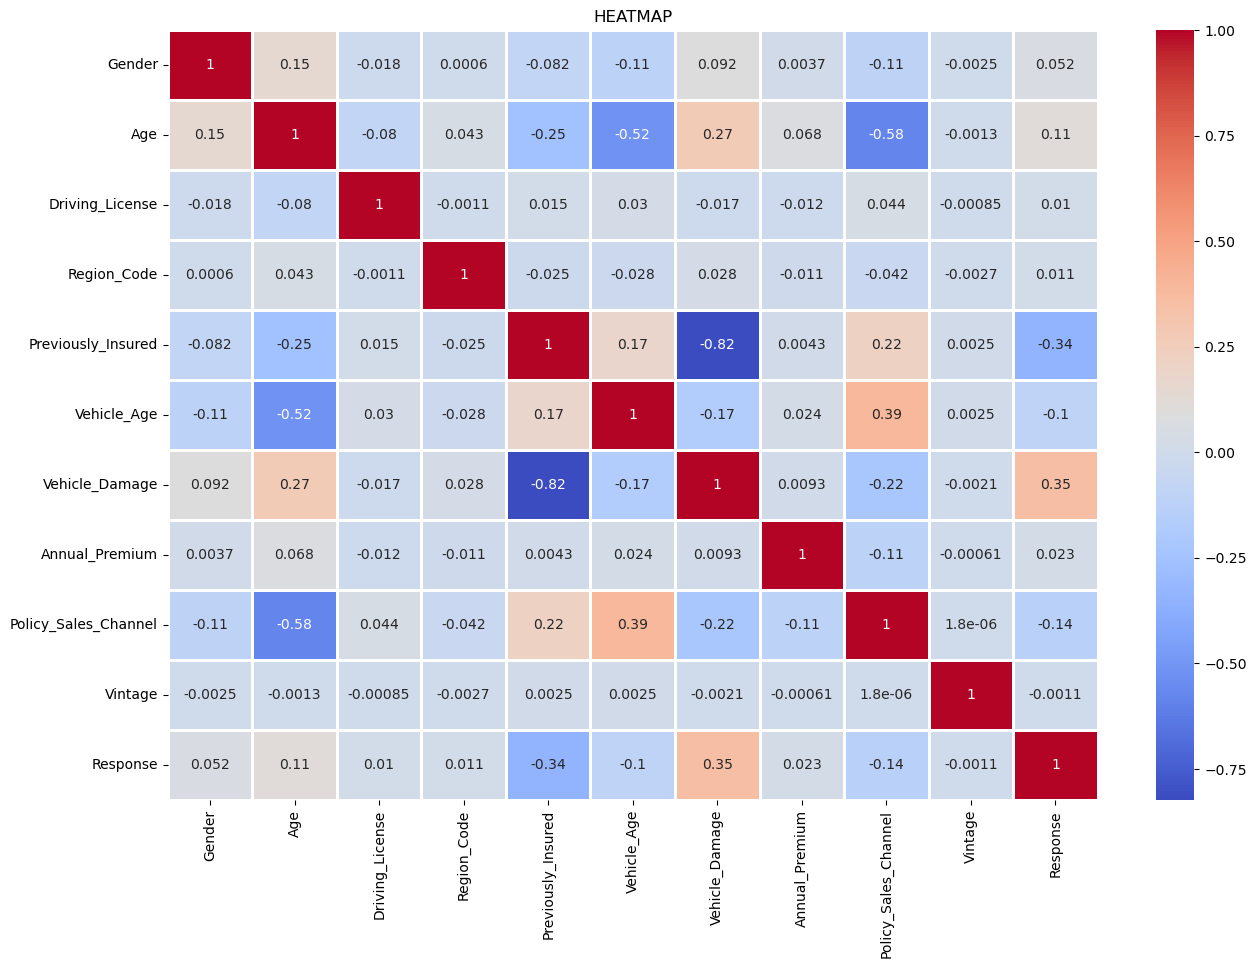

In [267]:
#Heatmap
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(cr1,linewidth=1,annot=True,cmap="coolwarm")
plt.title("HEATMAP")
plt.show()

# Outlier Treatment

<AxesSubplot:>

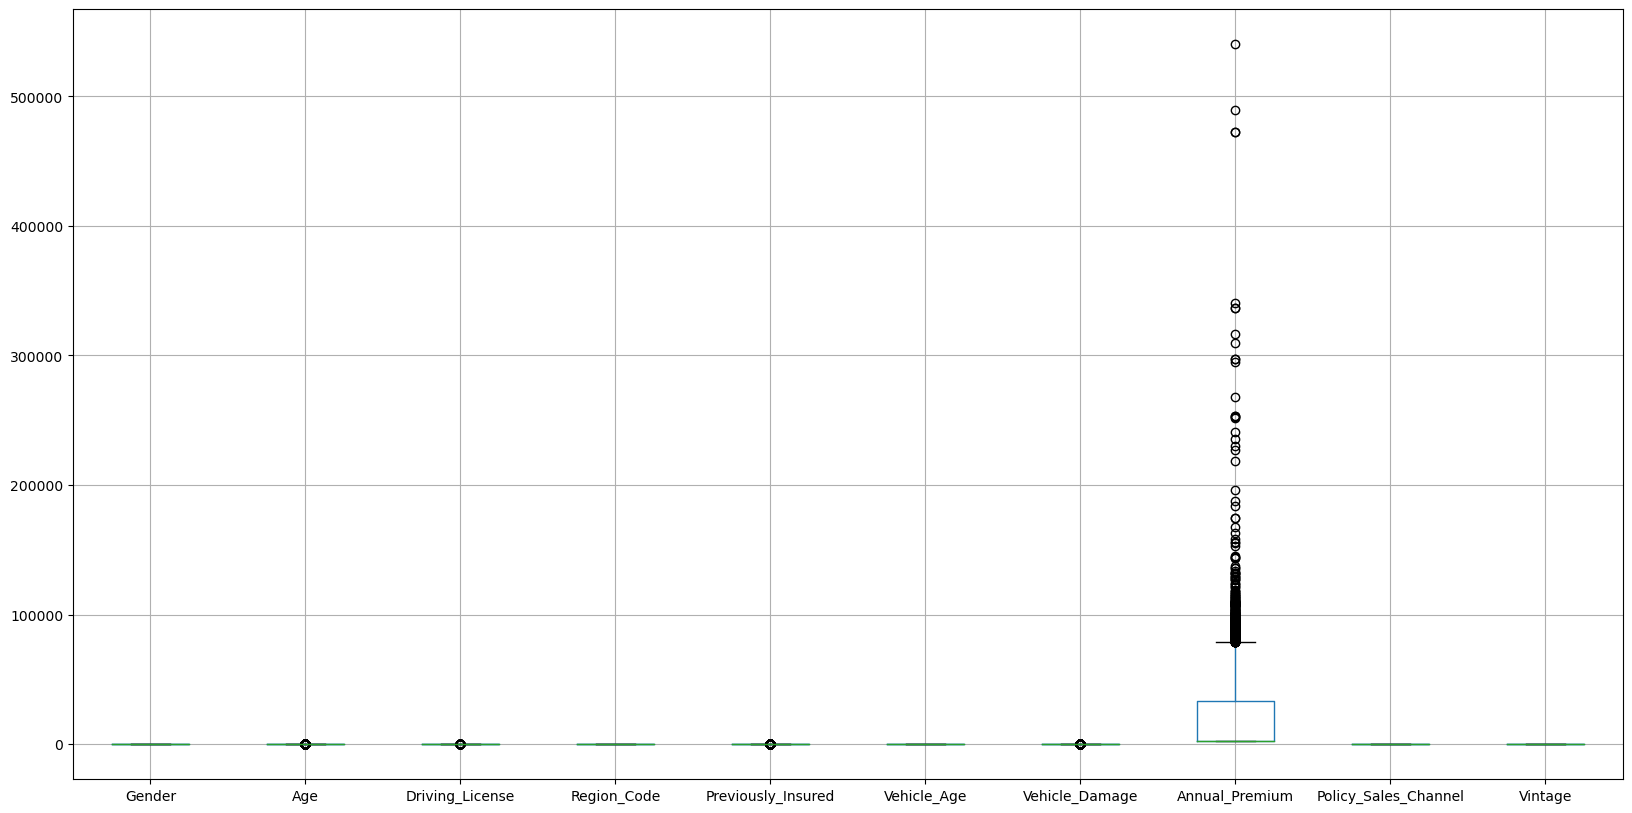

In [95]:
x_nm.boxplot(figsize=(20,10))

In [96]:
x_nm.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,46,1,28,0,0,1,2630,26,294
1,0,35,1,28,0,0,1,2630,156,249
2,1,50,1,29,0,0,1,2630,124,40
3,1,46,1,28,0,0,1,2630,26,20
4,0,30,1,28,0,0,1,2630,156,280


# According to boxplot five features have outliers

In [97]:
#x_nm.Vehicle_Damage.value_counts()

# "Vehicle_Damage","Driving_License","Previously_Insured" is a categorical features so no need to treat outlier

In [98]:
x_nm.Annual_Premium.value_counts()

2630     55200
69856       39
45179       11
27930       10
28868        9
         ...  
39094        1
50145        1
43554        1
28012        1
52742        1
Name: Annual_Premium, Length: 23015, dtype: int64

# Only "Annual_Premium" ,"Age" column need outlier treatment because another are categorical features

# Annual_Premium

In [99]:
#x_nm.boxplot(column="Annual_Premium")

<AxesSubplot:>

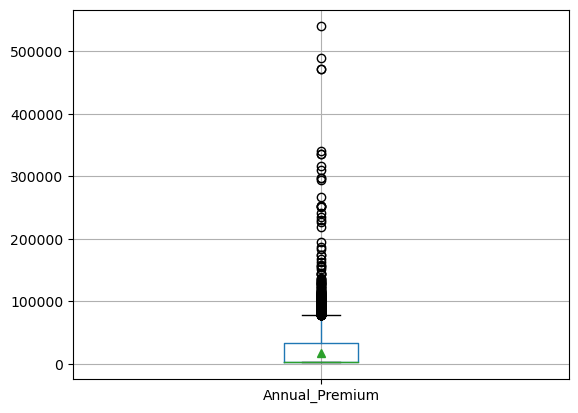

In [100]:
x_nm.boxplot(column="Annual_Premium",showmeans=True)

In [101]:
#sns.boxplot(data=x_nm,y="Annual_Premium")

<AxesSubplot:>

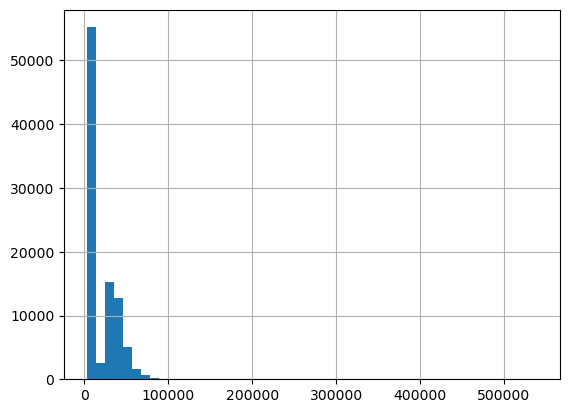

In [102]:
x_nm.Annual_Premium.hist(bins=50)

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

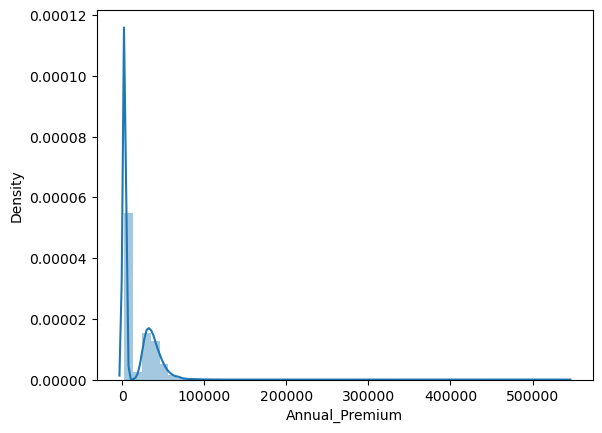

In [103]:
sns.distplot(x_nm["Annual_Premium"]) 

# The distplot is skewed one therefore iqr(inter quartile range) method is suitable for treatment of outliers

In [104]:
x_nm.Annual_Premium.describe()

count     93420.000000
mean      17122.828623
std       19590.259672
min        2630.000000
25%        2630.000000
50%        2630.000000
75%       33004.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [105]:
iqr1=x_nm.Annual_Premium.quantile(0.75)-x_nm.Annual_Premium.quantile(0.25)
iqr1

30374.0

In [106]:
#In boxplot the outliers are on the maxima,we have to calculate upper bound
u1=x_nm["Annual_Premium"].quantile(0.75)+3*iqr1   #upper bound
print(u1)

124126.0


In [107]:
x_nm.loc[x_nm["Annual_Premium"]>124126,"Annual_Premium"]=124126  #treating the outliers

<AxesSubplot:>

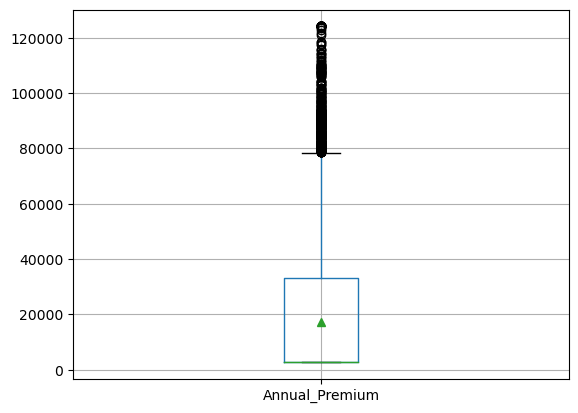

In [108]:
x_nm.boxplot(column="Annual_Premium",showmeans=True)

# Age

<AxesSubplot:>

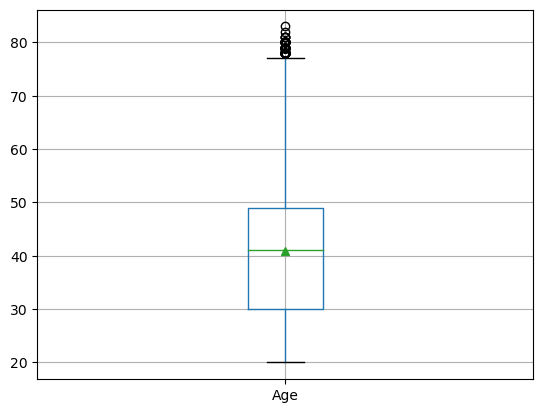

In [109]:
x_nm.boxplot(column="Age",showmeans=True)

<AxesSubplot:>

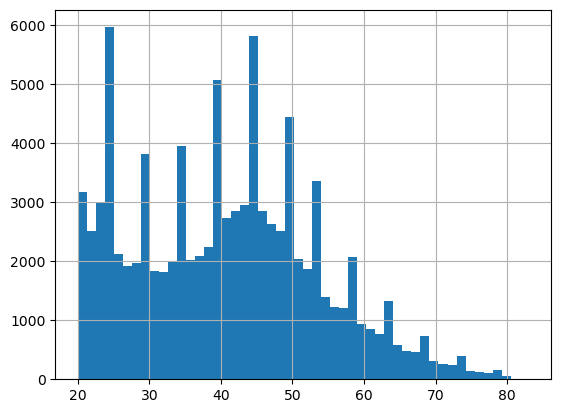

In [110]:
x_nm.Age.hist(bins=50)

<AxesSubplot:xlabel='Age', ylabel='Density'>

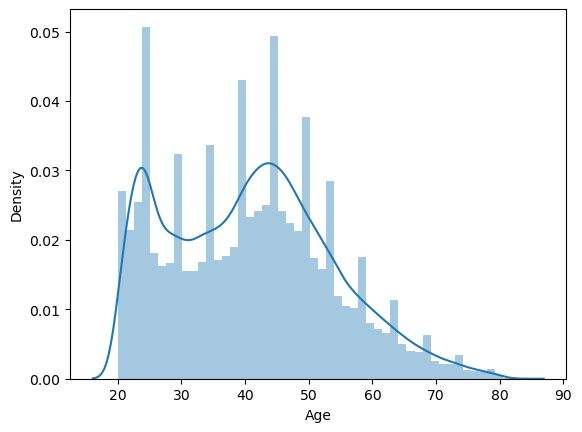

In [111]:
sns.distplot(x_nm["Age"]) 

# The distplot is normal distributed therefore using standard deviation we treat the outliers

In [112]:
x_nm.Age.describe()

count    93420.000000
mean        40.854903
std         12.897752
min         20.000000
25%         30.000000
50%         41.000000
75%         49.000000
max         83.000000
Name: Age, dtype: float64

In [113]:
#in boxplot the outliers are on the maxima,we have to calculate upper bound
u2=x_nm["Age"].mean()+3*x_nm["Age"].std()
u2

79.54815870878122

In [114]:
x_nm.loc[x_nm["Age"]>79.5481,"Age"]=79.5481              #treating the outliers

<AxesSubplot:>

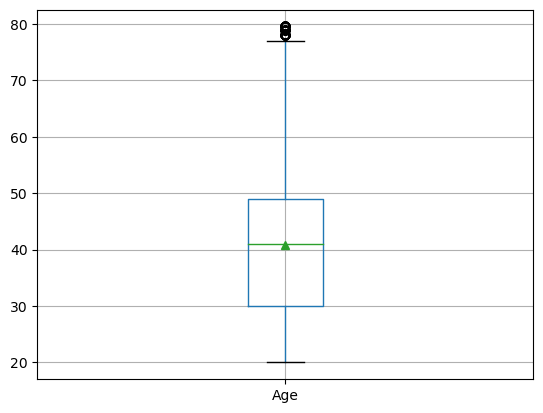

In [115]:
x_nm.boxplot(column="Age",showmeans=True)

# Data Transformation

# Skewness

In [116]:
x_nm1=x_nm[["Annual_Premium","Policy_Sales_Channel","Vintage","Age","Region_Code"]]
#x_nm1.head()    #framing a DataFrame only for the numerical column

In [117]:
from scipy.stats import skew

Annual_Premium
1.025866834745834


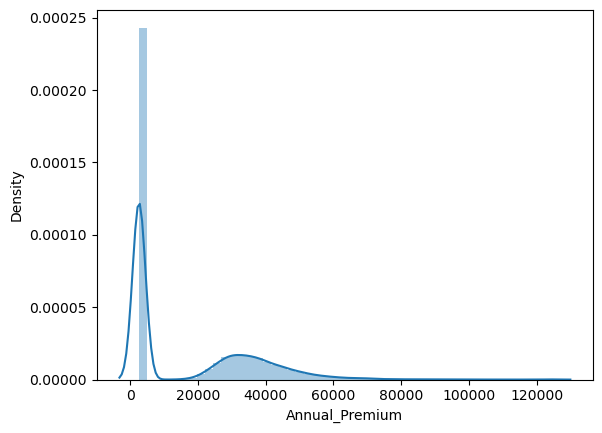

Policy_Sales_Channel
-0.7048617811647199


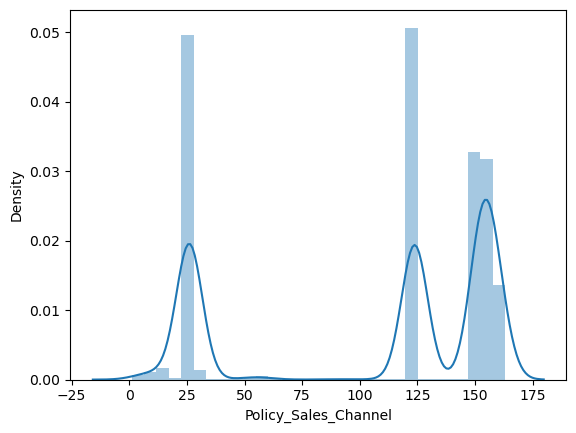

Vintage
0.0010803139983464785


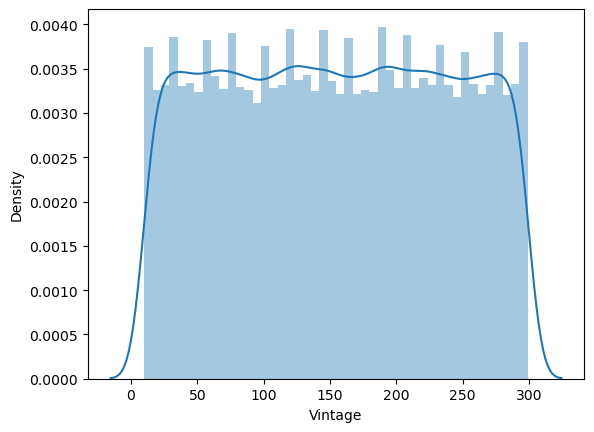

Age
0.33921084899438536


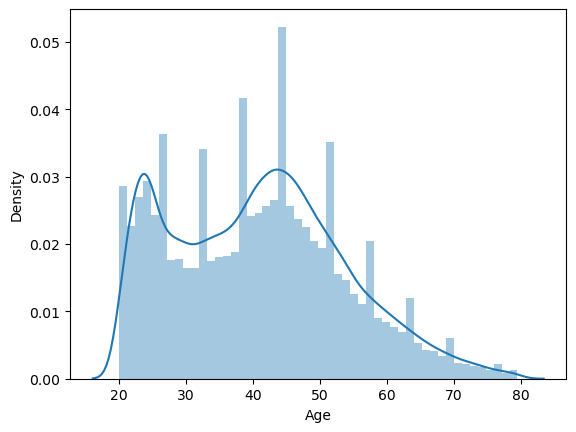

Region_Code
-0.19907372082656638


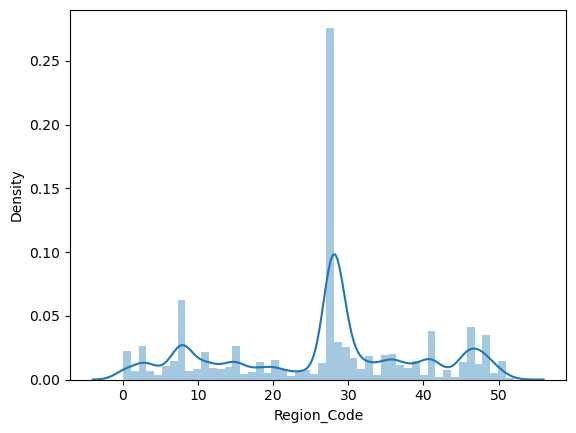

In [118]:
for col in x_nm1:
    print(col)
    print(skew(x_nm1[col]))
    
    plt.figure()
    sns.distplot(x_nm1[col])
    plt.show()

In [119]:
x_nm.skew()

Gender                  -0.349742
Age                      0.339216
Driving_License        -31.311355
Region_Code             -0.199077
Previously_Insured       1.417936
Vehicle_Age              1.290454
Vehicle_Damage          -1.203276
Annual_Premium           1.025883
Policy_Sales_Channel    -0.704873
Vintage                  0.001080
dtype: float64

#For the "Annual_Premium" we have to treat skewness because it shows 1.025883 skewness and according rule the skewness must be in the range of -1 to 1.
#For the other numerical features no need to treat skewness because the skewness  is in the range of -1 to 1.

In [121]:
x_nm["Annual_Premium"]=np.cbrt(x_nm["Annual_Premium"])

In [264]:
x_nm.Annual_Premium.skew()

0.5199722999348411

# Model on Train data to check performance after the class imbalance technique and EDA(outlier & skewness treatment)

In [123]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x_nm,y_nm,test_size=0.2,random_state=100)

# Logistic Regression

In [124]:
lg.fit(x2_train,y2_train)

LogisticRegression()

In [125]:
lg_pred2=lg.predict(x2_test)
lg_pred2

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [126]:
m9=confusion_matrix(lg_pred2,y2_test)
m9

array([[9392, 1716],
       [   7, 7569]], dtype=int64)

In [127]:
ac9=m9.diagonal().sum()/m9.sum()*100
ac9

90.77820595161636

In [128]:
print(classification_report(lg_pred2,y2_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     11108
           1       0.82      1.00      0.90      7576

    accuracy                           0.91     18684
   macro avg       0.91      0.92      0.91     18684
weighted avg       0.92      0.91      0.91     18684



In [129]:
#Logistic Regression
#the confusion matrix is good.
#the accuracy is good.
#precision for 0 is 1.00 & recall for 1 is 1.00 which is not good.
#so it is not good algorithm.

# AUC_ROC curve for Logistic Regression

In [130]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [131]:
roc_lg=roc_auc_score(lg_pred2,y2_test)
roc_lg

0.9222963871277834

In [132]:
pred_valuelg=lg.predict_proba(x2_test)
pred_valuelg

array([[9.38624079e-01, 6.13759207e-02],
       [5.83741922e-04, 9.99416258e-01],
       [1.21051337e-03, 9.98789487e-01],
       ...,
       [1.37434898e-04, 9.99862565e-01],
       [1.24947249e-04, 9.99875053e-01],
       [1.01743221e-04, 9.99898257e-01]])

In [133]:
df_roclg=pd.DataFrame(pred_valuelg)
df_roclg

,0,1
0,0.938624,0.061376
1,0.000584,0.999416
2,0.001211,0.998789
3,0.999228,0.000772
4,0.726409,0.273591
...,...,...
18679,0.797551,0.202449
18680,0.737996,0.262004
18681,0.000137,0.999863
18682,0.000125,0.999875


In [134]:
fpr_lg,tpr_lg,threshold_lg=roc_curve(y2_test,df_roclg.iloc[:,1])

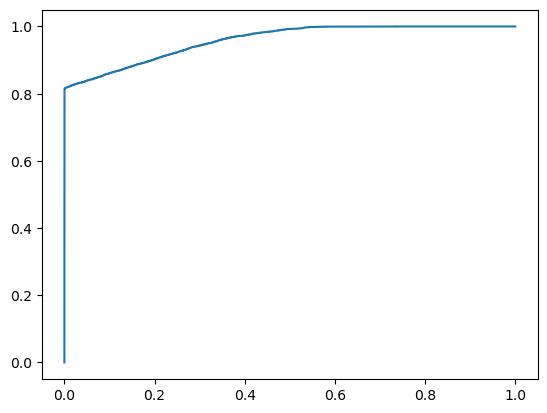

In [135]:
plt.plot(fpr_lg,tpr_lg)

# Decision Tree

In [136]:
dt.fit(x2_train,y2_train)

DecisionTreeClassifier()

In [137]:
dt_pred2=dt.predict(x2_test)
dt_pred2

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [138]:
m10=confusion_matrix(dt_pred2,y2_test)
m10

array([[8161, 1128],
       [1238, 8157]], dtype=int64)

In [139]:
ac10=m10.diagonal().sum()/m10.sum()*100
ac10

87.33675872404196

In [140]:
print(classification_report(dt_pred2,y2_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      9289
           1       0.88      0.87      0.87      9395

    accuracy                           0.87     18684
   macro avg       0.87      0.87      0.87     18684
weighted avg       0.87      0.87      0.87     18684



In [141]:
#Decision Tree
#the confusion matrix is good.
#the accuracy is good.
#precision, recall & f1-score are also good.
#so we can say that it is best algorithm with accuracy 87.33

# AUC_ROC curve for Decision Tree

In [142]:
roc_dt=roc_auc_score(dt_pred2,y2_test)
roc_dt

0.8733969132975643

In [143]:
pred_valuedt=dt.predict_proba(x2_test)
pred_valuedt

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [144]:
df_rocdt=pd.DataFrame(pred_valuedt)
df_rocdt

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
18679,1.0,0.0
18680,1.0,0.0
18681,0.0,1.0
18682,0.0,1.0


In [145]:
fpr_dt,tpr_dt,threshold_dt=roc_curve(y2_test,df_rocdt.iloc[:,1])

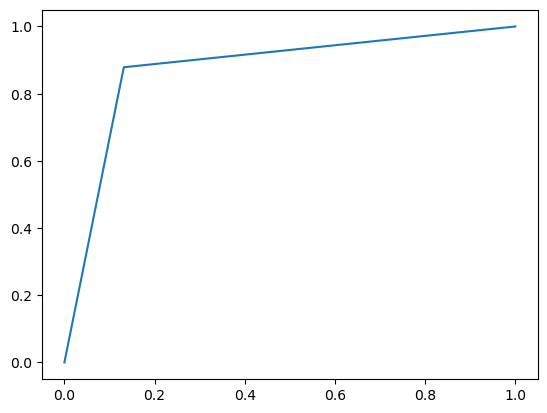

In [146]:
plt.plot(fpr_dt,tpr_dt)

# Random Forest

In [147]:
rf.fit(x2_train,y2_train)

RandomForestClassifier()

In [148]:
rf_pred2=rf.predict(x2_test)
rf_pred2

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [149]:
m11=confusion_matrix(rf_pred2,y2_test)
m11

array([[8948, 1396],
       [ 451, 7889]], dtype=int64)

In [150]:
ac11=m11.diagonal().sum()/m11.sum()*100
ac11

90.11453650181974

In [151]:
print(classification_report(rf_pred2,y2_test))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91     10344
           1       0.85      0.95      0.90      8340

    accuracy                           0.90     18684
   macro avg       0.90      0.91      0.90     18684
weighted avg       0.91      0.90      0.90     18684



In [152]:
#Random Forest
#the confusion matrix is good.
#the accuracy is also good as compared to the Decision Tree having 87.33 accuracy.
#precision,recall & f1-score are also good.
#so we can say that it is best algorithm with accuracy 90.11

# AUC_ROC curve for Random Forest

In [153]:
roc_rf=roc_auc_score(rf_pred2,y2_test)
roc_rf

0.9054828990635797

In [154]:
pred_valuerf=rf.predict_proba(x2_test)
pred_valuerf

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [155]:
df_rocrf=pd.DataFrame(pred_valuerf)
df_rocrf

,0,1
0,1.00,0.00
1,0.00,1.00
2,0.01,0.99
3,1.00,0.00
4,0.96,0.04
...,...,...
18679,0.88,0.12
18680,0.41,0.59
18681,0.00,1.00
18682,0.00,1.00


In [156]:
fpr_rf,tpr_rf,threshold_rf=roc_curve(y2_test,df_rocrf.iloc[:,1])

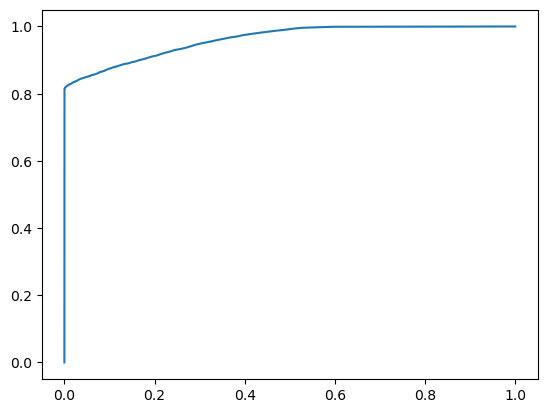

In [157]:
plt.plot(fpr_rf,tpr_rf)

# Boosting(Adaboost)

In [158]:
ab.fit(x2_train,y2_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [159]:
ab_pred2=ab.predict(x2_test)
ab_pred2

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [160]:
m12=confusion_matrix(ab_pred2,y2_test)
m12

array([[8771, 1392],
       [ 628, 7893]], dtype=int64)

In [161]:
ac12=m12.diagonal().sum()/m12.sum()*100
ac12

89.18861057589382

In [162]:
print(classification_report(ab_pred2,y2_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.90     10163
           1       0.85      0.93      0.89      8521

    accuracy                           0.89     18684
   macro avg       0.89      0.89      0.89     18684
weighted avg       0.90      0.89      0.89     18684



In [163]:
#Boosting(Adaboost)
#the confusion matrix is good.
#the accuracy is good but less than the accuracy of random forest.
#precision,recall & f1-score are also good.
#as compared to random forest adaboost is not best suited.

# AUC_ROC curve for Adaboost

In [164]:
roc_ab=roc_auc_score(ab_pred2,y2_test)
roc_ab

0.8946661496009598

In [165]:
pred_valueab=ab.predict_proba(x2_test)
pred_valueab

array([[1.00000000e+00, 4.05381696e-10],
       [1.12230642e-07, 9.99999888e-01],
       [1.12230642e-07, 9.99999888e-01],
       ...,
       [1.12230642e-07, 9.99999888e-01],
       [1.12230642e-07, 9.99999888e-01],
       [1.12230642e-07, 9.99999888e-01]])

In [166]:
df_rocab=pd.DataFrame(pred_valueab)
df_rocab

,0,1
0,1.000000e+00,4.053817e-10
1,1.122306e-07,9.999999e-01
2,1.122306e-07,9.999999e-01
3,1.000000e+00,4.053817e-10
4,9.999995e-01,5.477418e-07
...,...,...
18679,1.000000e+00,3.000214e-13
18680,4.053817e-10,1.000000e+00
18681,1.122306e-07,9.999999e-01
18682,1.122306e-07,9.999999e-01


In [167]:
fpr_ab,tpr_ab,threshold_ab=roc_curve(y2_test,df_rocab.iloc[:,1])

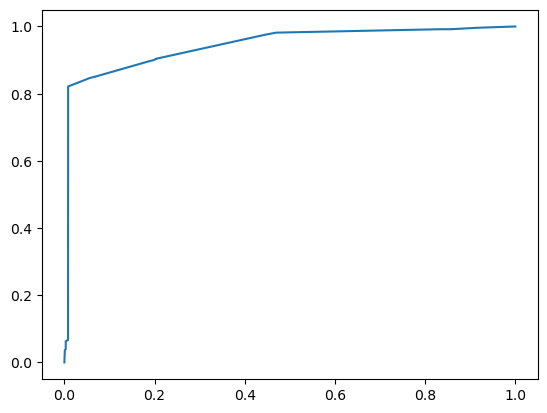

In [168]:
plt.plot(fpr_ab,tpr_ab)

# Xgboost

In [169]:
xg.fit(x2_train,y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [170]:
xg_pred2=xg.predict(x2_test)
xg_pred2

array([0, 1, 1, ..., 1, 1, 1])

In [171]:
m13=confusion_matrix(xg_pred2,y2_test)
m13

array([[9280, 1558],
       [ 119, 7727]], dtype=int64)

In [172]:
ac13=m13.diagonal().sum()/m13.sum()*100
ac13

91.02440590879898

In [173]:
print(classification_report(xg_pred2,y2_test))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     10838
           1       0.83      0.98      0.90      7846

    accuracy                           0.91     18684
   macro avg       0.91      0.92      0.91     18684
weighted avg       0.92      0.91      0.91     18684



In [174]:
#Boosting(Xgboost)
#the confusion matrix is good.
#the accuracy is good and more than the random forest.
#f1-score is good but precision for 0 is 0.99 which is not good.
#as compared to random forest xgboost is not best suited as it shows precision for 0 is 0.99

# AUC_ROC curve for Xgboost

In [175]:
roc_xg=roc_auc_score(xg_pred2,y2_test)
roc_xg

0.920539787946951

In [176]:
pred_valuexg=xg.predict_proba(x2_test)
pred_valuexg

array([[9.3169844e-01, 6.8301558e-02],
       [1.3303757e-04, 9.9986696e-01],
       [3.7789345e-05, 9.9996221e-01],
       ...,
       [1.4674664e-04, 9.9985325e-01],
       [1.5854836e-05, 9.9998415e-01],
       [7.4267387e-05, 9.9992573e-01]], dtype=float32)

In [177]:
df_rocxg=pd.DataFrame(pred_valuexg)
df_rocxg

,0,1
0,0.931698,0.068302
1,0.000133,0.999867
2,0.000038,0.999962
3,0.999388,0.000612
4,0.835775,0.164225
...,...,...
18679,0.846322,0.153678
18680,0.197159,0.802841
18681,0.000147,0.999853
18682,0.000016,0.999984


In [178]:
fpr_xg,tpr_xg,threshold_xg=roc_curve(y2_test,df_rocxg.iloc[:,1])

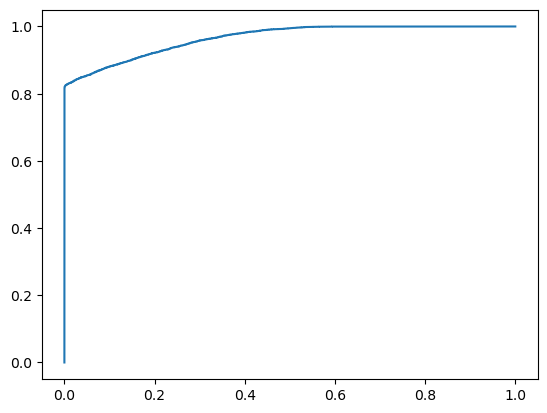

In [179]:
plt.plot(fpr_xg,tpr_xg)

# Naive Bayes

In [180]:
nb.fit(x2_train,y2_train)

MultinomialNB()

In [181]:
nb_pred2=nb.predict(x2_test)

In [182]:
m14=confusion_matrix(nb_pred2,y2_test)
m14

array([[7521, 2702],
       [1878, 6583]], dtype=int64)

In [183]:
ac14=m14.diagonal().sum()/m14.sum()*100
ac14

75.48704774138301

In [184]:
print(classification_report(nb_pred2,y2_test))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77     10223
           1       0.71      0.78      0.74      8461

    accuracy                           0.75     18684
   macro avg       0.75      0.76      0.75     18684
weighted avg       0.76      0.75      0.76     18684



In [185]:
#Naive Bayes
#the confusion matrix is good.
#the accuracy not that much good.
#precision,recall & precision are good.
#as compared to random forest naive bayes is not best suited as it having accuracy 75.48

# AUC_ROC curve for Naive Bayes

In [186]:
roc_nb=roc_auc_score(nb_pred2,y2_test)
roc_nb

0.7568672220174426

In [187]:
pred_valuenb=nb.predict_proba(x2_test)
pred_valuenb

array([[9.99999937e-01, 6.33915868e-08],
       [4.76727041e-05, 9.99952327e-01],
       [3.03927722e-12, 1.00000000e+00],
       ...,
       [2.89487445e-17, 1.00000000e+00],
       [3.06230612e-16, 1.00000000e+00],
       [3.20436515e-15, 1.00000000e+00]])

In [188]:
df_rocnb=pd.DataFrame(pred_valuenb)
df_rocnb

,0,1
0,9.999999e-01,6.339159e-08
1,4.767270e-05,9.999523e-01
2,3.039277e-12,1.000000e+00
3,1.732893e-05,9.999827e-01
4,1.000000e+00,4.411293e-10
...,...,...
18679,1.000000e+00,1.289459e-09
18680,9.999998e-01,2.070668e-07
18681,2.894874e-17,1.000000e+00
18682,3.062306e-16,1.000000e+00


In [189]:
fpr_nb,tpr_nb,threshold_nb=roc_curve(y2_test,df_rocnb.iloc[:,1])

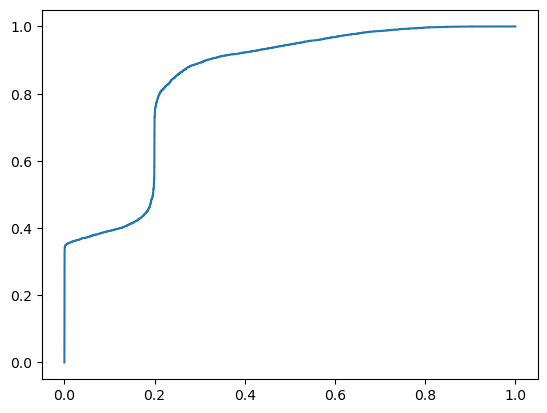

In [190]:
plt.plot(fpr_nb,tpr_nb)

# AUC_ROC Curve

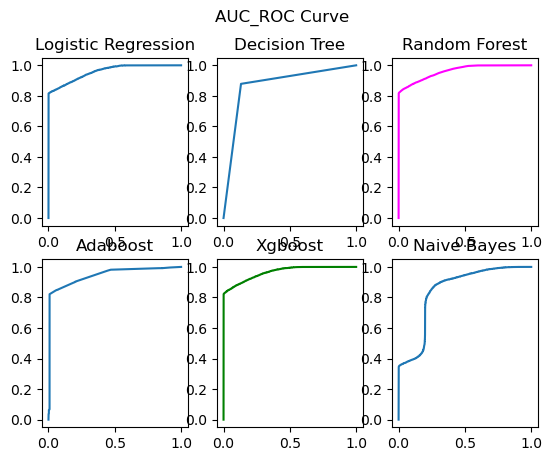

In [191]:
#subplot
plt.subplot(2,3,1)
plt.plot(fpr_lg,tpr_lg)
plt.title("Logistic Regression")

plt.subplot(2,3,2)
plt.plot(fpr_dt,tpr_dt)
plt.title("Decision Tree")

plt.subplot(2,3,3)
plt.plot(fpr_rf,tpr_rf,color="magenta")
plt.title("Random Forest")

plt.subplot(2,3,4)
plt.plot(fpr_ab,tpr_ab)
plt.title("Adaboost")

plt.subplot(2,3,5)
plt.plot(fpr_xg,tpr_xg,color="green")
plt.title("Xgboost")

plt.subplot(2,3,6)
plt.plot(fpr_nb,tpr_nb)
plt.title("Naive Bayes")

plt.suptitle("AUC_ROC Curve")
plt.show()

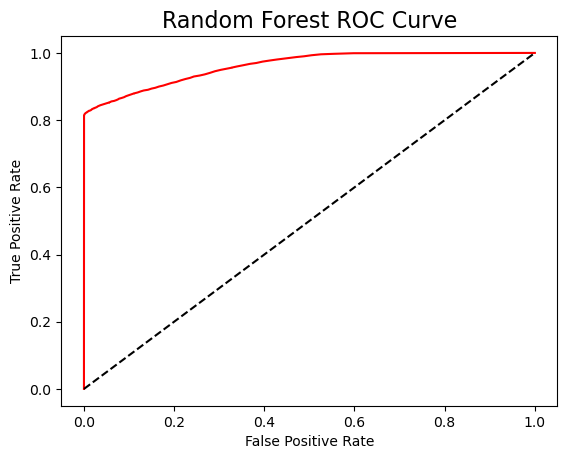

In [263]:
plt.plot(fpr_rf,tpr_rf,color="red")
plt.plot([0, 1], [0, 1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

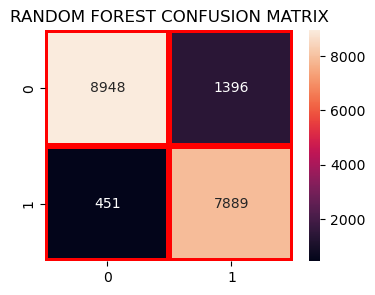

In [193]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(rf_pred2,y2_test),
                annot=True,fmt = "d",linecolor="r",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=12)
plt.show()

According to AUC_ROC curve Logistic Regression, Random Forest, Adaboost & Xgboost are good but Logistic Regression, Xgboost are overfitted & Adaboost(acc=85.54) having low accuracy as compared to Random Forest(acc=90.05).

# So we can conclude that Random Forest is best suited for our model having accuracy 90.11

# Feature Selection
RFE(Recursive feature elimination)

In [194]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [195]:
rfe=RFE(dt)

In [196]:
rfe.fit(x2_train,y2_train)

RFE(estimator=DecisionTreeClassifier())

In [197]:
rfe.support_

array([False,  True, False,  True, False, False,  True,  True, False,
        True])

In [198]:
train_new=pd.DataFrame({"feature support":list(rfe.support_),"columns":list(train.iloc[:,0:-1].columns)})
train_new

,feature support,columns
0,False,Gender
1,True,Age
2,False,Driving_License
3,True,Region_Code
4,False,Previously_Insured
5,False,Vehicle_Age
6,True,Vehicle_Damage
7,True,Annual_Premium
8,False,Policy_Sales_Channel
9,True,Vintage


In [199]:
train_1=train_new.sort_values("feature support",ascending=False)
train_1

,feature support,columns
1,True,Age
3,True,Region_Code
6,True,Vehicle_Damage
7,True,Annual_Premium
9,True,Vintage
0,False,Gender
2,False,Driving_License
4,False,Previously_Insured
5,False,Vehicle_Age
8,False,Policy_Sales_Channel


# according to feature selection technique we drop the unnecessary columns

In [200]:
x_nm2=x_nm.drop(["Policy_Sales_Channel","Driving_License","Gender","Previously_Insured","Vehicle_Age"],axis=1)

In [201]:
#x_nm2.head()

# Model on data to check performnance after the feature selection technique(RFE)

In [202]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x_nm2,y_nm,test_size=0.2,random_state=100)

In [203]:
x3_train.shape,x3_test.shape,y3_train.shape,y3_test.shape

((74736, 5), (18684, 5), (74736,), (18684,))

# Logistic Regression

In [204]:
lg.fit(x3_train,y3_train)

LogisticRegression()

In [205]:
lg_pred3=lg.predict(x3_test)

In [206]:
m15=confusion_matrix(lg_pred3,y3_test)
m15

array([[9397, 1713],
       [   2, 7572]], dtype=int64)

In [207]:
ac15=m15.diagonal().sum()/m15.sum()*100
ac15

90.82102333547421

In [208]:
print(classification_report(lg_pred3,y3_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     11110
           1       0.82      1.00      0.90      7574

    accuracy                           0.91     18684
   macro avg       0.91      0.92      0.91     18684
weighted avg       0.93      0.91      0.91     18684



In [209]:
#Logistic Regression
#the confusion matrix is good.
#the accuracy is good.(90.8210)
#precision,recall & f1-score are good.
#but as compared previous logistic Regression algorithm it is not good.
#so it is not good algorithm for our data.

# Decision Tree

In [210]:
dt.fit(x3_train,y3_train)

DecisionTreeClassifier()

In [211]:
dt_pred3=dt.predict(x3_test)

In [212]:
m16=confusion_matrix(dt_pred3,y3_test)
m16

array([[8122, 1307],
       [1277, 7978]], dtype=int64)

In [213]:
ac16=m16.diagonal().sum()/m16.sum()*100
ac16

86.16998501391565

In [214]:
print(classification_report(dt_pred3,y3_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      9429
           1       0.86      0.86      0.86      9255

    accuracy                           0.86     18684
   macro avg       0.86      0.86      0.86     18684
weighted avg       0.86      0.86      0.86     18684



In [215]:
#Decision Tree
#the confusion matrix is good.
#the accuracy is good.(86.23)
#precision,recall & f1-score are also good.
#but as compared previous Decision Tree algorithm(acc=87.32) it is not good.
#so it is not good algorithm for our data.

# Random Forest

In [216]:
rf.fit(x3_train,y3_train)

RandomForestClassifier()

In [217]:
rf_pred3=rf.predict(x3_test)

In [218]:
m17=confusion_matrix(rf_pred3,y3_test)
m17

array([[8763, 1473],
       [ 636, 7812]], dtype=int64)

In [219]:
ac17=m17.diagonal().sum()/m17.sum()*100
ac17

88.71226718047527

In [220]:
print(classification_report(rf_pred3,y3_test))  

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     10236
           1       0.84      0.92      0.88      8448

    accuracy                           0.89     18684
   macro avg       0.89      0.89      0.89     18684
weighted avg       0.89      0.89      0.89     18684



In [221]:
#Random Forest
#the confusion matrix is good.
#the accuracy is good.
#precision,recall & f1-score are good.
#but as compared previous Random Forest algorithm(acc=90.11) it is not good.
#so it is not good algorithm for our data.

# Boosting(Adaboost)

In [222]:
ab.fit(x3_train,y3_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5)

In [223]:
ab_pred3=ab.predict(x3_test)

In [224]:
m18=confusion_matrix(ab_pred3,y3_test)
m18

array([[8282, 1328],
       [1117, 7957]], dtype=int64)

In [225]:
ac18=m18.diagonal().sum()/m18.sum()*100
ac18

86.91393705844574

In [226]:
print(classification_report(ab_pred3,y3_test)) 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      9610
           1       0.86      0.88      0.87      9074

    accuracy                           0.87     18684
   macro avg       0.87      0.87      0.87     18684
weighted avg       0.87      0.87      0.87     18684



In [227]:
#Boosting(Adaboost)
#the confusion matrix is good.
#the accuracy(86.66) is good but less than the accuracy of Logistic Regression.
#precision,recall & f1-score are also good.
#but as compared previous Adaboost algorithm it is not good.
#so it is not good algorithm for our data.

# Xgboost

In [228]:
xg.fit(x3_train,y3_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [229]:
xg_pred3=xg.predict(x3_test)

In [230]:
m19=confusion_matrix(xg_pred3,y3_test)
m19

array([[9356, 1682],
       [  43, 7603]], dtype=int64)

In [231]:
ac19=m19.diagonal().sum()/m19.sum()*100
ac19

90.76750160565189

In [232]:
print(classification_report(xg_pred3,y3_test)) 

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     11038
           1       0.82      0.99      0.90      7646

    accuracy                           0.91     18684
   macro avg       0.91      0.92      0.91     18684
weighted avg       0.92      0.91      0.91     18684



In [233]:
#Boosting(Xgboost)
#the confusion matrix is good.
#the accuracy(90.76) is good and more than the Logistic Regression.
#f1-score is good but precision for 0 is 1.00 which is not good.
#as compared to logistic Regression xgboost is not best suited as it shows precision for 0 is 1.00

# Naive Bayes

In [234]:
nb.fit(x3_train,y3_train)

MultinomialNB()

In [235]:
nb_pred3=nb.predict(x3_test)

In [236]:
m20=confusion_matrix(nb_pred3,y3_test)
m20

array([[6521, 2509],
       [2878, 6776]], dtype=int64)

In [237]:
ac20=m20.diagonal().sum()/m20.sum()*100
ac20

71.16784414472276

In [238]:
print(classification_report(nb_pred3,y3_test)) 

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      9030
           1       0.73      0.70      0.72      9654

    accuracy                           0.71     18684
   macro avg       0.71      0.71      0.71     18684
weighted avg       0.71      0.71      0.71     18684



In [239]:
#Naive Bayes
#the confusion matrix is good.
#the accuracy good.
#precision, recall & precision are good.
#It is not good .

# So after feature selection we have best algorithm as Random Forest having accuracy 88.71

# But without feature selection we have best algorithm as Random Forest with accuracy 90.11

# So we can conclude that the Feature Selection is not best suited for our model

# test file

In [240]:
#Reading the csv file with help of pandas library
test=pd.read_csv(r"C:\Users\HP\Desktop\Cross Sell-Prediction\test.csv")
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11,1,< 1 Year,No,35786,152,53
1,381111,Male,40,1,28,0,1-2 Year,Yes,33762,7,111
2,381112,Male,47,1,28,0,1-2 Year,Yes,40050,124,199
3,381113,Male,24,1,27,1,< 1 Year,Yes,37356,152,187
4,381114,Male,27,1,28,1,< 1 Year,No,59097,152,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37,1,< 1 Year,No,30867,152,56
127033,508143,Female,38,1,28,0,1-2 Year,Yes,28700,122,165
127034,508144,Male,21,1,46,1,< 1 Year,No,29802,152,74
127035,508145,Male,71,1,28,1,1-2 Year,No,62875,26,265


In [241]:
test.shape

(127037, 11)

In [242]:
#we assign "id" feature to data21 variable
data2=test["id"]
data2

0         381110
1         381111
2         381112
3         381113
4         381114
           ...  
127032    508142
127033    508143
127034    508144
127035    508145
127036    508146
Name: id, Length: 127037, dtype: int64

according to train file we droped unnecessary features.

In [243]:
test1=test.drop(["id"],axis=1)

In [244]:
#null value
test1.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [245]:
#Converting categorical column into numerical column(using LableEncoder)
test1.Gender=le.fit_transform(test1.Gender)
test1.Vehicle_Age=le.fit_transform(test1.Vehicle_Age)
test1.Vehicle_Damage=le.fit_transform(test1.Vehicle_Damage)

In [246]:
test1.dtypes

Gender                  int32
Age                     int64
Driving_License         int64
Region_Code             int64
Previously_Insured      int64
Vehicle_Age             int32
Vehicle_Damage          int32
Annual_Premium          int64
Policy_Sales_Channel    int64
Vintage                 int64
dtype: object

In [247]:
#test1.head()

In [248]:
x_nm.shape,y_nm.shape   #Random Forest (near miss) model

((93420, 10), (93420,))

In [249]:
te_x=test1.iloc[:,0:10]       #test data

In [250]:
#te_x.head()

In [251]:
te_x.shape,x_nm.shape,y_nm.shape

((127037, 10), (93420, 10), (93420,))

In [252]:
#so we fitting the Random Forest model on test data

In [253]:
rf.fit(x_nm,y_nm)

RandomForestClassifier()

In [254]:
rf_pred4=rf.predict(te_x)
rf_pred4

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [255]:
#Prediction of "Response"(target feature) 

In [256]:
df=pd.DataFrame(rf_pred4,columns=["Response"])
df

,Response
0,1
1,1
2,1
3,1
4,1
...,...
127032,1
127033,1
127034,1
127035,1


In [257]:
#creating a dataframe with id feature of test data.

In [258]:
d1=pd.DataFrame(data2)
d1

,id
0,381110
1,381111
2,381112
3,381113
4,381114
...,...
127032,508142
127033,508143
127034,508144
127035,508145


In [259]:
#concating d1 and df

In [260]:
result=pd.concat([d1,df],axis=1)
result

,id,Response
0,381110,1
1,381111,1
2,381112,1
3,381113,1
4,381114,1
...,...,...
127032,508142,1
127033,508143,1
127034,508144,1
127035,508145,1


In [261]:
#converting dataframe into csv file.

In [262]:
result.to_csv(r"C:\Users\HP\Desktop\Cross Sell-Prediction\Sample_Submission.csv",index=False)